# Packages

In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

In [2]:
print(sys.version)

2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
num_rand = 42
np.random.seed(num_rand)

# Dados

In [4]:
bank = pd.read_csv("bank-full.csv", sep=";", quotechar="\"")

In [5]:
bank.shape

(45211, 17)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Dummy

In [8]:
column_names = ["job",
"marital",
"education",
"default",
"housing",
"loan",
"contact",
"month",
"poutcome",
"y"]

bank = pd.get_dummies(bank, drop_first=True, columns=column_names)

In [9]:
bank.shape

(45211, 43)

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_s

# Split X/y

In [11]:
features = []
for c in bank.columns:
    if c not in ["y_yes"]:
        features.append(c)
        print(c)

age
balance
day
duration
campaign
pdays
previous
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_married
marital_single
education_secondary
education_tertiary
education_unknown
default_yes
housing_yes
loan_yes
contact_telephone
contact_unknown
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
poutcome_other
poutcome_success
poutcome_unknown


In [12]:
bank_x = bank[features]
bank_y = bank["y_yes"]

In [13]:
bank_x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Análise

/stage/libs/python/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


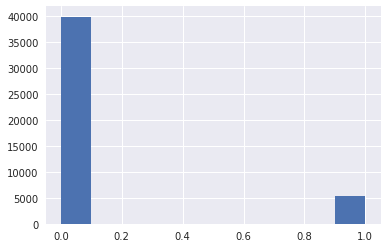

In [14]:
bank["y_yes"].hist()

In [15]:
print(bank["y_yes"].value_counts())
print(bank["y_yes"].value_counts(normalize=True))

0    39922
1     5289
Name: y_yes, dtype: int64
0    0.883015
1    0.116985
Name: y_yes, dtype: float64


# Desbalanceamento

Estratégia: para cada 1 "yes", manter 2 "no" (downsampling 1/3)

In [16]:
n_bank_yes = len(bank[bank.y_yes == 1])
bank_no = resample(bank[bank.y_yes == 0], n_samples=2*len(bank[bank.y_yes == 1]), random_state=num_rand)

In [17]:
bank_new = pd.concat([bank[bank.y_yes == 1], bank_no])

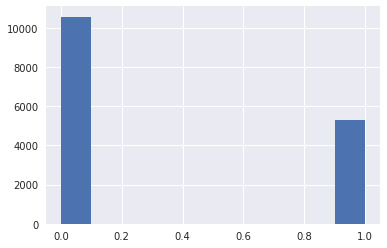

In [18]:
bank_new["y_yes"].hist()

In [31]:
bank_x = bank_new[features]
bank_y = bank_new["y_yes"]

In [32]:
bank_y.value_counts()

0    10578
1     5289
Name: y_yes, dtype: int64

# Modelagem

## Grid Search

In [33]:
param_grid = {"n_estimators": [15, 20, 25, 30],
              "max_depth": [5, 15, None],
              "max_features": ["log2", "sqrt", None],              
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [34]:
rf = RandomForestClassifier(n_jobs=-1, random_state=num_rand)
gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
gs_rf.fit(bank_x, bank_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 20, 25, 30], 'max_features': ['log2', 'sqrt', None], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
print(gs_rf.best_params_)

{'max_features': None, 'n_estimators': 15, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 5}


In [36]:
# salva modelo
pk.dump(gs_rf.best_estimator_, open("model_rf", "wb"))

## K-fold Cross-Validation

In [37]:
# carrega modelo
#rf = pk.load(open("model_rf", "rb")

# cria melhor modelo
rf = gs_rf.best_estimator_

In [38]:
kfold = KFold(n_splits=10, random_state=num_rand, shuffle=True)

accuracy = []
precision = []
recall = []
auc = []

for idx_train, idx_test in kfold.split(bank_x):
    X_train, y_train = bank_x.iloc[idx_train], bank_y.iloc[idx_train]
    X_test, y_test = bank_x.iloc[idx_test], bank_y.iloc[idx_test]    
        
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, pred))
    precision.append(precision_score(y_test, pred))
    recall.append(recall_score(y_test, pred))
    auc.append(roc_auc_score(y_test, pred))

In [39]:
print(np.mean(accuracy))

0.8188071269480671


In [40]:
print(np.mean(precision))

0.7686444218005489


In [41]:
print(np.mean(recall))

0.6534823883159635


In [42]:
print(np.mean(auc))

0.7775239906533434


# Features

In [44]:
[rf.feature_importances_, features]

[array([7.09003334e-03, 5.65010083e-03, 2.02501405e-03, 5.62221735e-01,
        2.42247160e-03, 4.29133337e-03, 7.33613975e-04, 1.33702096e-04,
        0.00000000e+00, 0.00000000e+00, 2.81922037e-04, 3.70839723e-04,
        1.61323572e-04, 3.82121900e-04, 0.00000000e+00, 4.71856119e-04,
        0.00000000e+00, 9.37794106e-05, 8.73479201e-04, 4.91081890e-04,
        2.08907516e-04, 1.80301119e-04, 1.92928708e-04, 0.00000000e+00,
        5.83822859e-02, 5.37899559e-04, 0.00000000e+00, 5.77234927e-02,
        5.03284029e-04, 8.78723839e-05, 1.08133095e-04, 1.61380955e-04,
        0.00000000e+00, 1.04345150e-03, 3.50505820e-02, 1.26535886e-03,
        7.80171015e-04, 1.16810242e-02, 2.58579598e-04, 8.52294993e-05,
        2.43838382e-01, 2.16326954e-04]),
 ['age',
  'balance',
  'day',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'job_blue-collar',
  'job_entrepreneur',
  'job_housemaid',
  'job_management',
  'job_retired',
  'job_self-employed',
  'job_services',
  'job_student

In [48]:
top_features = pd.DataFrame({"features": features, "importance": rf.feature_importances_})
print(top_features)

               features  importance
0                   age    0.007090
1               balance    0.005650
2                   day    0.002025
3              duration    0.562222
4              campaign    0.002422
5                 pdays    0.004291
6              previous    0.000734
7       job_blue-collar    0.000134
8      job_entrepreneur    0.000000
9         job_housemaid    0.000000
10       job_management    0.000282
11          job_retired    0.000371
12    job_self-employed    0.000161
13         job_services    0.000382
14          job_student    0.000000
15       job_technician    0.000472
16       job_unemployed    0.000000
17          job_unknown    0.000094
18      marital_married    0.000873
19       marital_single    0.000491
20  education_secondary    0.000209
21   education_tertiary    0.000180
22    education_unknown    0.000193
23          default_yes    0.000000
24          housing_yes    0.058382
25             loan_yes    0.000538
26    contact_telephone    0

In [51]:
top_features.sort_values(['importance'], ascending=False)

,features,importance
3,duration,0.562222
40,poutcome_success,0.243838
24,housing_yes,0.058382
27,contact_unknown,0.057723
34,month_mar,0.035051
37,month_oct,0.011681
0,age,0.007090
1,balance,0.005650
5,pdays,0.004291
4,campaign,0.002422
